<a href="https://colab.research.google.com/github/pallavibekal/IISC--MachineLearning-Module/blob/main/Group_10_M3_NB_MiniProject_3_Dementia_prediction_SVM_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini-Project: Dementia prediction using SVM

## Problem Statement

Prediction of Dementia using an SVM model on brain MRI features

## Learning Objectives

At the end of the mini-project, you will be able to :

* perform data exploration, preprocessing and visualization
* implement SVM Classifier on the data
* explore various parameters of SVM classifier and implement OneVsOne classifier
* calculate the metrics and plot the roc_curve

## Information

**About Dementia**

Dementia is a general term for loss of memory and other mental abilities severe enough to interfere with daily life. It is caused by physical changes in the brain. Alzheimer's is the most common type of dementia, but there are many kinds.

**Brain Imaging via magnetic resonance imaging (MRI) and Machine Learning**

* MRI is used for the evaluation of patients with suspected Alzheimer's disease
* MRIs detect both, local and generalized shrinkage of brain tissue.
* MRI features predict the rate of decline of AD and may guide therapy in the future
* Using machine learning on MRI features could help in automatedly and accurately predicting the progress of a patient from mild cognitive impairment to dementia

To understand the basics of MRI technique, you could refer [here](https://case.edu/med/neurology/NR/MRI%20Basics.htm)

## Dataset

The dataset chosen for this mini-project is [OASIS - Longitudinal brain MRI Dataset](https://www.oasis-brains.org/). This dataset consists of a longitudinal MRI collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

**Dataset fields:**

* Subject ID - Subject Identification
* MRI ID - MRI Exam Identification
* Group - Target variable with 3 labels ('NonDemented', 'Demented', 'Converted')
* Visit - Visit order
* MR Delay - MR Delay Time (Contrast)
* M/F - Male or Female
* Hand - Unique value 'R'
* MMSE - Mini-Mental State Examination score (range is from 0 = worst to 30 = best)
* CDR - Clinical Dementia Rating (0 = no dementia, 0.5 = very mild AD, 1 = mild AD, 2 = moderate AD)
* Derived anatomic volumes
* eTIV - Estimated total intracranial volume, mm3
* nWBV - Normalized whole-brain volume, expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process
* ASF - Atlas scaling factor (unitless). A computed scaling factor that transforms native-space brain and skull to the atlas target (i.e., the determinant of the transform matrix)

For learning more on building a machine learning model to predict dementia using SVM, refer [here](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7408873/).

## Grading = 10 Points

In [185]:
#@title Download the dataset
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/oasis_longitudinal.csv
print("Data downloaded successfully!")

Data downloaded successfully!


### Import required packages

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math
# sklearn imports
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.preprocessing import OneHotEncoder

In [187]:
from sklearn.metrics import accuracy_score


### Load the dataset

In [188]:
df_= pd.read_csv('oasis_longitudinal.csv')

In [189]:
df_.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [190]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [191]:
df_.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [192]:
df_['Group'].value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Group, dtype: int64

### Pre-processing and Data Engineering (2 points)

#### Remove unwanted columns

In [193]:
df_1 = df_.drop(['Subject ID', 'MRI ID','Hand'], axis = 1)
df_1.shape

(373, 12)

In [194]:
df_1.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


#### Encode categorical features into numeric

In [195]:
labelbin = LabelEncoder()
df_1['M/F_Enc']=labelbin.fit_transform(df_1['M/F'])
df_1

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_Enc
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,1
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,1
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,1
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,1
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037,1
369,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040,1
370,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331,0
371,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323,0


In [196]:
label_enc = LabelEncoder()
df_1['Group_enc'] = label_enc.fit_transform(df_1['Group'])
df_1

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_Enc,Group_enc
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,1,2
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,1,2
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,1,1
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,1,1
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037,1,1
369,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040,1,1
370,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331,0,2
371,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323,0,2


In [197]:
target_encoded = label_enc.classes_

In [198]:
df_1['Group'].replace('Converted','Demented',inplace=True)
df_1['Group'].value_counts()

Nondemented    190
Demented       183
Name: Group, dtype: int64

In [199]:
label_enc = LabelEncoder()
df_1['Group_Binary'] = label_enc.fit_transform(df_1['Group'])
df_1

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_Enc,Group_enc,Group_Binary
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,1,2,1
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,1,2,1
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,1,1,0
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,1,1,0
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037,1,1,0
369,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040,1,1,0
370,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331,0,2,1
371,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323,0,2,1


In [200]:
df_1.drop(['Group','M/F'],axis=1,inplace=True)
df_1

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_Enc,Group_enc,Group_Binary
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883,1,2,1
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876,1,2,1
2,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046,1,1,0
3,2,560,76,12,NaN,28.0,0.5,1738,0.713,1.010,1,1,0
4,3,1895,80,12,NaN,22.0,0.5,1698,0.701,1.034,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,82,16,1.0,28.0,0.5,1693,0.694,1.037,1,1,0
369,3,2297,86,16,1.0,26.0,0.5,1688,0.675,1.040,1,1,0
370,1,0,61,13,2.0,30.0,0.0,1319,0.801,1.331,0,2,1
371,2,763,63,13,2.0,30.0,0.0,1327,0.796,1.323,0,2,1


#### Handle the null values by removing or replacing

In [201]:
df_1.isnull().sum()

Visit            0
MR Delay         0
Age              0
EDUC             0
SES             19
MMSE             2
CDR              0
eTIV             0
nWBV             0
ASF              0
M/F_Enc          0
Group_enc        0
Group_Binary     0
dtype: int64

In [202]:
df_1['SES'].fillna(df_1['SES'].mean(),inplace=True)
df_1['MMSE'].fillna(df_1['MMSE'].mean(),inplace=True)

In [203]:
df_1.isnull().sum()

Visit           0
MR Delay        0
Age             0
EDUC            0
SES             0
MMSE            0
CDR             0
eTIV            0
nWBV            0
ASF             0
M/F_Enc         0
Group_enc       0
Group_Binary    0
dtype: int64

#### Identify feature and target and split it into train test

In [204]:
df_1.columns

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'M/F_Enc', 'Group_enc', 'Group_Binary'],
      dtype='object')

In [205]:
X = df_1.iloc[:,:-2]
y_multiclass = df_1.iloc[:,-2]
y_binaryclass = df_1.iloc[:,-1]

In [206]:
X

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_Enc
0,1,0,87,14,2.000000,27.0,0.0,1987,0.696,0.883,1
1,2,457,88,14,2.000000,30.0,0.0,2004,0.681,0.876,1
2,1,0,75,12,2.460452,23.0,0.5,1678,0.736,1.046,1
3,2,560,76,12,2.460452,28.0,0.5,1738,0.713,1.010,1
4,3,1895,80,12,2.460452,22.0,0.5,1698,0.701,1.034,1
...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,82,16,1.000000,28.0,0.5,1693,0.694,1.037,1
369,3,2297,86,16,1.000000,26.0,0.5,1688,0.675,1.040,1
370,1,0,61,13,2.000000,30.0,0.0,1319,0.801,1.331,0
371,2,763,63,13,2.000000,30.0,0.0,1327,0.796,1.323,0


In [207]:
y_binaryclass

0      1
1      1
2      0
3      0
4      0
      ..
368    0
369    0
370    1
371    1
372    1
Name: Group_Binary, Length: 373, dtype: int64

In [208]:
# Train test for multiclass 
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y_multiclass, test_size= 0.3, random_state= 123)
print(X_train_multi.shape, y_train_multi.shape)
print(X_test_multi.shape, y_test_multi.shape)

(261, 11) (261,)
(112, 11) (112,)


### EDA &  Visualization (1 point)

#### Plot the distribution of all the variables using a histogram

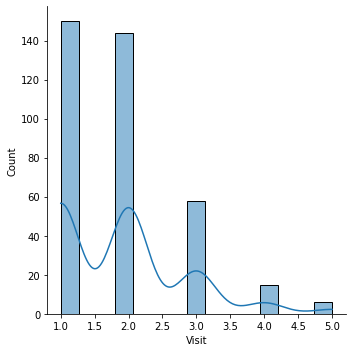

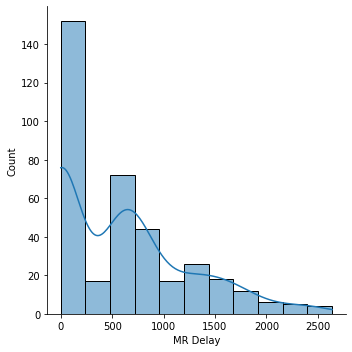

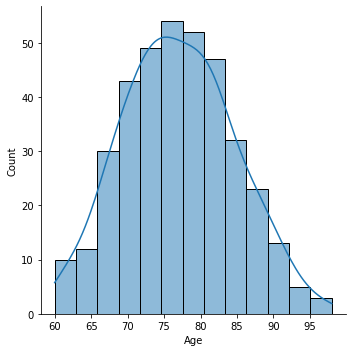

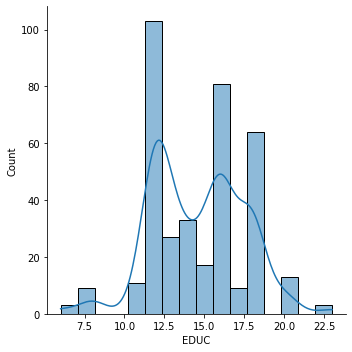

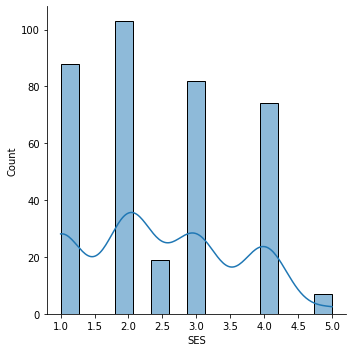

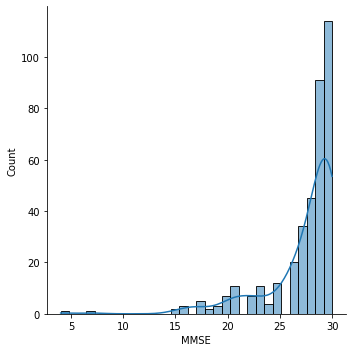

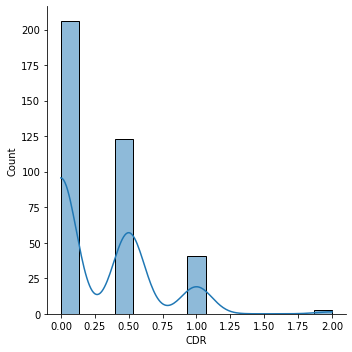

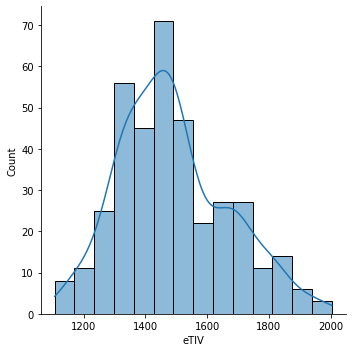

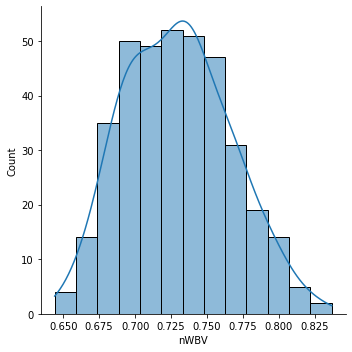

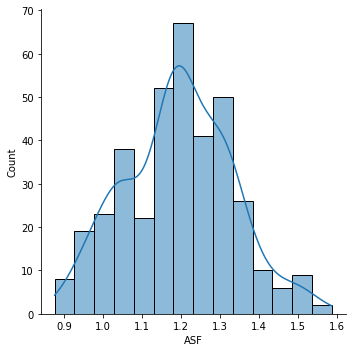

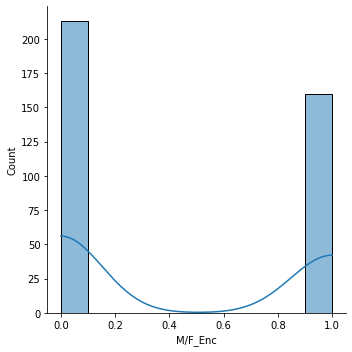

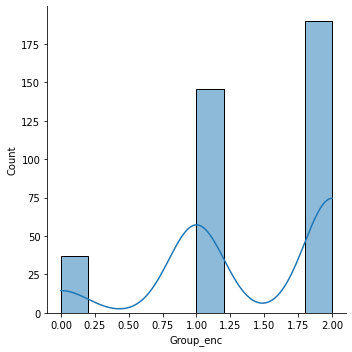

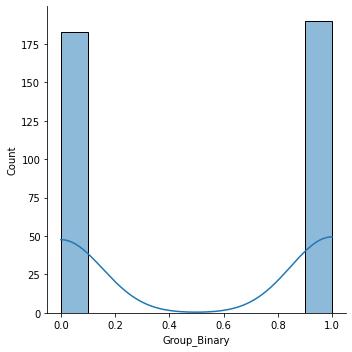

In [209]:
%matplotlib inline
for column in df_1.columns:
  sns.displot(df_1, x=column, kde=True)

#### Visualize the frequency of Age

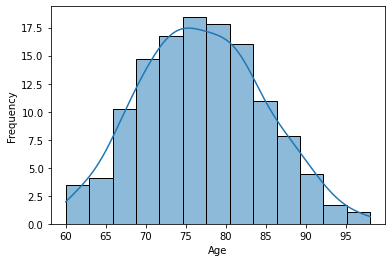

In [210]:
sns.histplot(data=df_1, x="Age", stat='frequency', kde=True)
plt.show()

In [211]:
df_1.CDR.value_counts()

0.0    206
0.5    123
1.0     41
2.0      3
Name: CDR, dtype: int64

In [212]:
visit_mask = df_1['Visit'] == 1.0

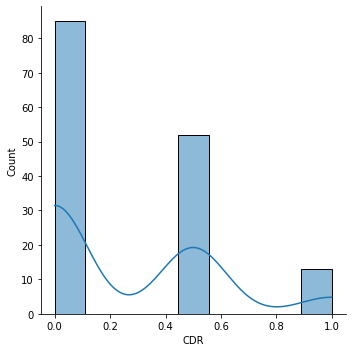

In [213]:
sns.displot(data=df_1[visit_mask], x="CDR", kde=True)

#### How many people have Alzheimer? Visualize with an appropriate plot

the same person visits two or more times; extract the single visit data and plot

**Hint**: Visit = 1

In [214]:
# YOUR CODE HERE

#### Calculate the correlation of features and plot the heatmap

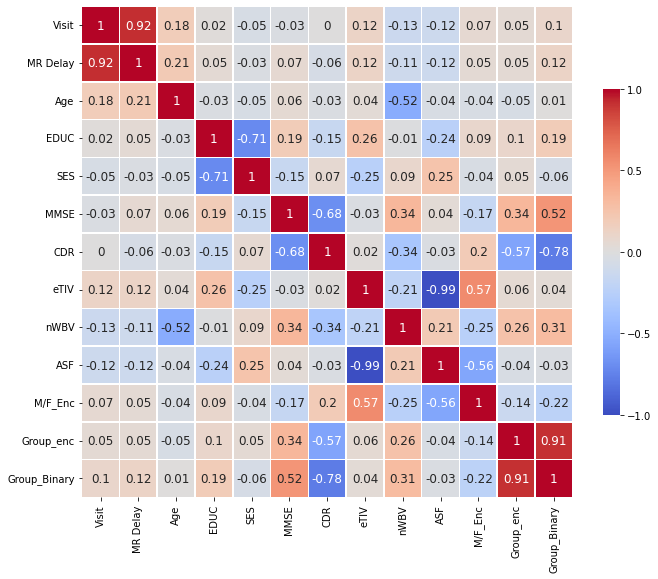

In [215]:

corr_matrix=df_1.corr().round(2)

f, ax = plt.subplots(figsize=(11, 15)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

### Model training and evaluation (4 points)

**Hint:** SVM model from sklearn

In [216]:
clf = SVC(kernel='linear')
clf.fit(X_train_multi, y_train_multi)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [217]:
y_pred_multi = clf.predict(X_test_multi)
acc_linear = accuracy_score(y_test_multi, y_pred_multi)
print(acc_linear)

0.8928571428571429


In [169]:
print("accuracy: ", metrics.accuracy_score(y_test_multi, y_pred_multi))
#print("precision: ", metrics.precision_score(y_test_multi, y_pred_multi)) 
#print("recall: ", metrics.recall_score(y_test_multi, y_pred_multi))
#print("f1: ", metrics.f1_score(y_test_multi, y_pred_multi))
#print("area under curve (auc): ", metrics.roc_auc_score(y_test_multi, y_pred_multi))

accuracy:  0.8928571428571429


#### Support vectors of the model

* Find the samples of the dataset which are the support vectors of the model 

In [140]:
clf.support_vectors_.shape

(92, 11)

In [161]:
X.columns

Index(['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV',
       'nWBV', 'ASF', 'M/F_Enc'],
      dtype='object')

In [165]:
support_df = pd.DataFrame(clf.support_vectors_,columns=X.columns)
support_df

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,M/F_Enc
0,1.0,0.0,68.0,16.0,3.0,30.0,0.0,1298.0,0.799,1.352,0.0
1,1.0,0.0,71.0,16.0,1.0,27.0,0.0,1289.0,0.771,1.362,0.0
2,3.0,1042.0,81.0,18.0,1.0,29.0,0.5,1647.0,0.717,1.066,1.0
3,2.0,1707.0,73.0,16.0,3.0,29.0,0.5,1287.0,0.771,1.364,0.0
4,3.0,1631.0,89.0,16.0,2.0,30.0,0.5,1408.0,0.679,1.246,1.0
...,...,...,...,...,...,...,...,...,...,...,...
87,2.0,670.0,80.0,8.0,5.0,27.0,0.0,1381.0,0.751,1.270,0.0
88,3.0,1329.0,69.0,18.0,2.0,29.0,0.0,1202.0,0.770,1.461,0.0
89,1.0,0.0,81.0,13.0,2.0,29.0,0.0,1345.0,0.737,1.305,0.0
90,2.0,1510.0,78.0,18.0,2.0,30.0,0.0,1484.0,0.703,1.183,1.0


#### Confusion matrix for multi-class classification

* Predict the test and plot the confusion matrix

In [114]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_multi, y_pred_multi)
mat

array([[ 3,  1,  6],
       [ 4, 38,  0],
       [ 0,  1, 59]])

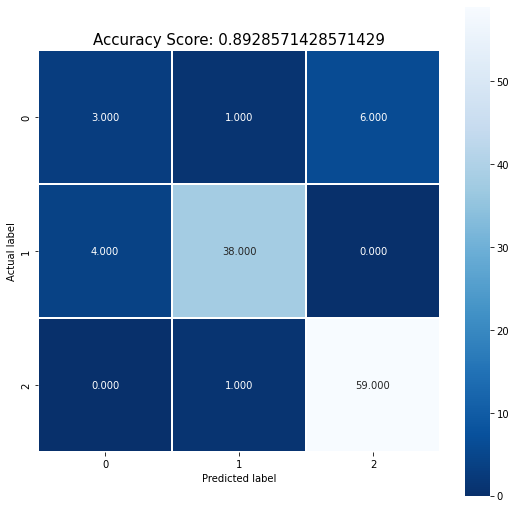

In [115]:
plt.figure(figsize=(9,9))
sns.heatmap(mat, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_linear)
plt.title(all_sample_title, size = 15);

#### One VS Rest Classifier

OneVsRestClassifier can also be used for multilabel classification. For each classifier, the class is fitted against all the other classes. In addition to its computational efficiency (only n_classes classifiers are needed)

* Fit `OneVsRestClassifier` on the data and find the accuracy

Hint: [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html)

In [145]:
clf_ovr = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train_multi, y_train_multi)


In [146]:
y_pred_multi_ovr = clf_ovr.predict(X_test_multi)
acc_ovr = accuracy_score(y_test_multi, y_pred_multi_ovr)
print(acc_ovr)

0.9107142857142857


#### One VS One Classifier

This strategy consists of fitting one classifier per class pair. At prediction time, the class which received the most votes is selected.

* Fit `OneVsOneClassifier` on the data and find the accuracy

Hint: [OneVsOneClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)

In [147]:
clf_ovo = OneVsOneClassifier(SVC(kernel='linear')).fit(X_train_multi, y_train_multi)


In [148]:
y_pred_multi_ovo = clf_ovo.predict(X_test_multi)
acc_ovo = accuracy_score(y_test_multi, y_pred_multi_ovo)
print(acc_ovo)

0.8928571428571429


#### Make it binary classification

As stated in the dataset description, 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit. Change `Converted` label into `Demented`.

**Note:** In two-class classification, encode the labels into numerical to plot the roc_curve with predictions.

In [121]:
# Train test for binary class 
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X, y_binaryclass, test_size= 0.3, random_state= 123)
print(X_train_bin.shape, y_train_bin.shape)
print(X_test_bin.shape, y_test_bin.shape)

(261, 11) (261,)
(112, 11) (112,)


#### Compare the performance and predictions of both multi-class and binary classifications

In [122]:
clf_binary = SVC(kernel='linear')
clf_binary.fit(X_train_bin, y_train_bin)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [123]:
y_pred_binary = clf_binary.predict(X_test_bin)
acc_binary = accuracy_score(y_test_bin, y_pred_binary)
print(acc_binary)

0.9375


### Classification report and metrics (2 points)

#### Confusion matrix

Describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [126]:
mat_bin = confusion_matrix(y_test_bin, y_pred_binary)
mat_bin

array([[46,  6],
       [ 1, 59]])

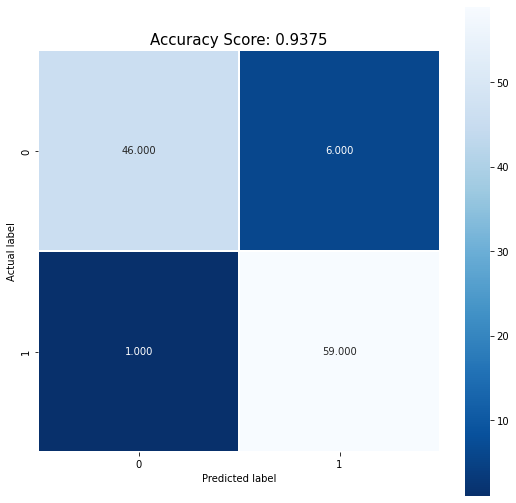

In [127]:
plt.figure(figsize=(9,9))
sns.heatmap(mat_bin, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(acc_binary)
plt.title(all_sample_title, size = 15);

#### Plot the ROC Curve

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

In [138]:
print("accuracy: ", metrics.accuracy_score(y_test_bin, y_pred_binary))
print("precision: ", metrics.precision_score(y_test_bin, y_pred_binary)) 
print("recall: ", metrics.recall_score(y_test_bin, y_pred_binary))
print("f1: ", metrics.f1_score(y_test_bin, y_pred_binary))
print("area under curve (auc): ", metrics.roc_auc_score(y_test_bin, y_pred_binary))


accuracy:  0.9375
precision:  0.9076923076923077
recall:  0.9833333333333333
f1:  0.944
area under curve (auc):  0.933974358974359


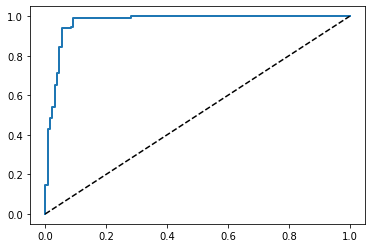

In [144]:
y_scores = clf_binary.decision_function(X_train_bin)
fpr, tpr, thresholds = metrics.roc_curve(y_train_bin, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
   plt.plot(fpr, tpr, linewidth=2, label=label)
   plt.plot([0, 1], [0,1], 'k--')
   
plot_roc_curve(fpr, tpr)
plt.show()

In [149]:
# OVR for Binary class
clf_ovr_bin = OneVsRestClassifier(SVC(kernel='linear')).fit(X_train_bin, y_train_bin)

In [151]:
y_pred_bin_ovr = clf_ovr_bin.predict(X_test_bin)
acc_ovr_bin = accuracy_score(y_test_bin, y_pred_bin_ovr)
print(acc_ovr_bin)

0.9375


In [154]:
#OVO for Binary Class
clf_ovo_bin = OneVsOneClassifier(SVC(kernel='linear')).fit(X_train_bin, y_train_bin)

In [156]:
y_pred_bin_ovo = clf_ovo_bin.predict(X_test_bin)
acc_ovo_bin = accuracy_score(y_test_bin, y_pred_bin_ovo)
print(acc_ovo_bin)

0.9375


### Choice of C for SVM (1 point)

experiment with different C values given and plot the ROC curve for each

Accuracy: 0.5892857142857143
gamma: 5
C: 0.0001


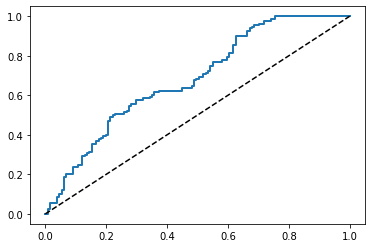

Accuracy: 0.6875
gamma: 5
C: 0.001


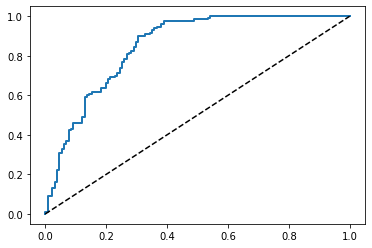

Accuracy: 0.8303571428571429
gamma: 5
C: 0.01


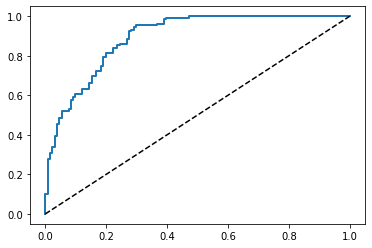

Accuracy: 0.9285714285714286
gamma: 5
C: 0.1


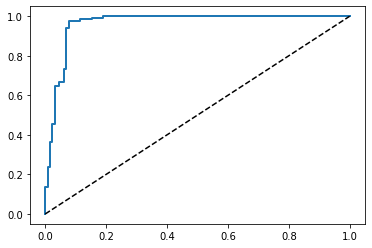

Accuracy: 0.9375
gamma: 5
C: 1


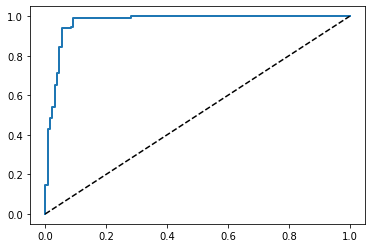

Accuracy: 0.9375
gamma: 5
C: 10


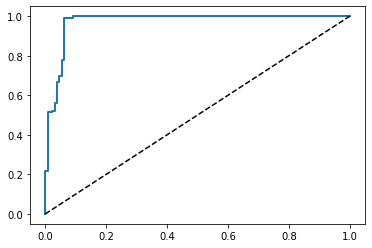

Accuracy: 0.9375
gamma: 5
C: 100


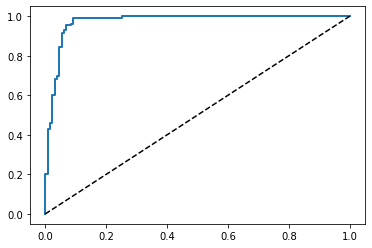

Accuracy: 0.9375
gamma: 5
C: 1000


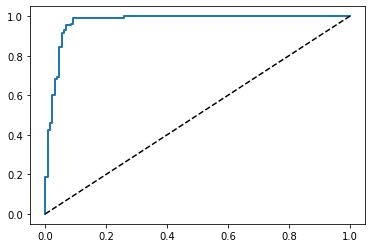

In [220]:
gamma = 0.1
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
accuracy_list=[]
def plot_roc_curve(fpr, tpr, label=None):
   plt.plot(fpr, tpr, linewidth=2, label=label)
   plt.plot([0, 1], [0,1], 'k--')

for C in C_values:
    model = SVC(kernel='linear', gamma = g, C=C).fit(X_train_bin, y_train_bin)
    y_prediction = model.predict(X_test_bin)
    accuracy = accuracy_score(y_test_bin, y_prediction)
    accuracy_list.append(accuracy)
    print('Accuracy:',accuracy)
    print('gamma:',g)
    print('C:',C)
    y_scores = model.decision_function(X_train_bin)
    fpr, tpr, thresholds = metrics.roc_curve(y_train_bin, y_scores)

    plot_roc_curve(fpr, tpr)
    plt.show()
    

### Report Analysis

* Compare the performance of the model with various Kernel parameters.
* Discuss the impact of parameter C and gamma on performance.
* Comment on the computational cost of implementing one vs one and one vs all to solve multi-class classification with binary classifier.
* When do you call a sample/record in the data as a support vector?